In [88]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [89]:
df = pd.read_csv("Airline_Passenger_Satisfaction.csv")

df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [90]:

df = df.dropna()
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [91]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [92]:
df_subset = df[["Departure Delay in Minutes","Arrival Delay in Minutes"]]

ss = StandardScaler()

x_scaled = ss.fit_transform(df_subset)

print(x_scaled)

[[ 0.96207412  0.77989414]
 [-0.38254681 -0.39291334]
 [-0.38254681 -0.39291334]
 ...
 [-0.38254681 -0.39291334]
 [-0.38254681 -0.39291334]
 [-0.38254681 -0.39291334]]


In [93]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [94]:
labels = model_kmeans.labels_
print(labels)

[0 1 1 ... 1 1 1]


In [95]:
df_kmeans = pd.DataFrame({'labels': labels, 'satisfaction': df.satisfaction})
# Buat Cross-Tab
cross_tab = pd.crosstab(df_kmeans['labels'], df_kmeans['satisfaction'])
print(cross_tab)

satisfaction  neutral or dissatisfied  satisfied
labels                                          
0                                1530        873
1                               12832      10403
2                                 166         89


In [96]:
plt.style.use('ggplot')
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

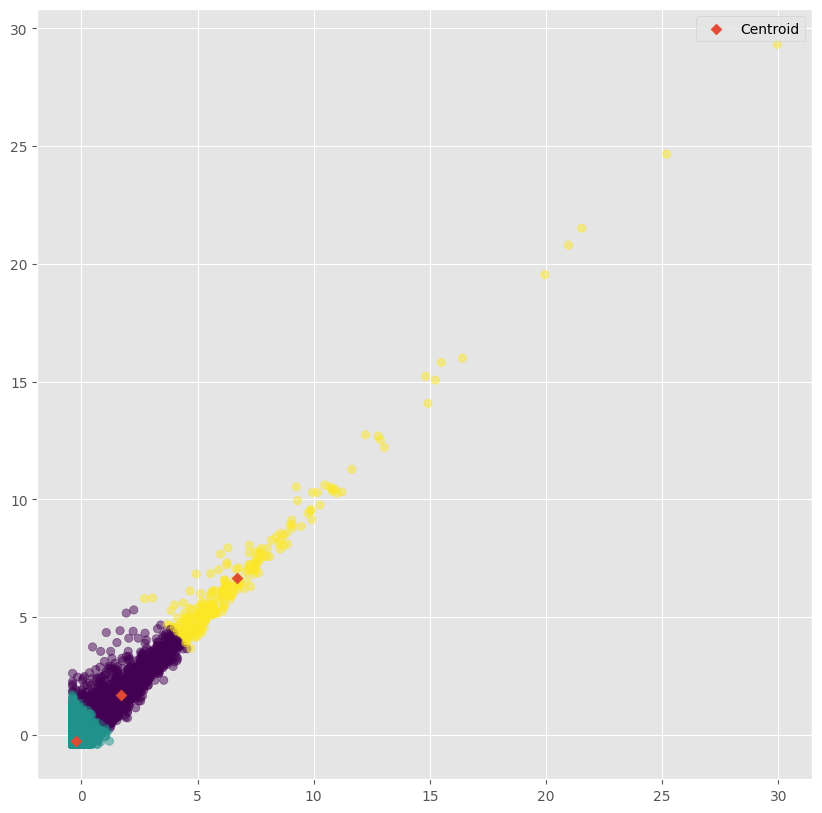

In [97]:
# Visualisasi Cluster 
plt.figure(figsize=(10,10))

# titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker= "D", s = 30)

# Beri label
plt.xlabel = ("Departure Delay in Minutes")
plt.ylabel = ("Arrival Delay in Minutes")

plt.legend()
plt.show()

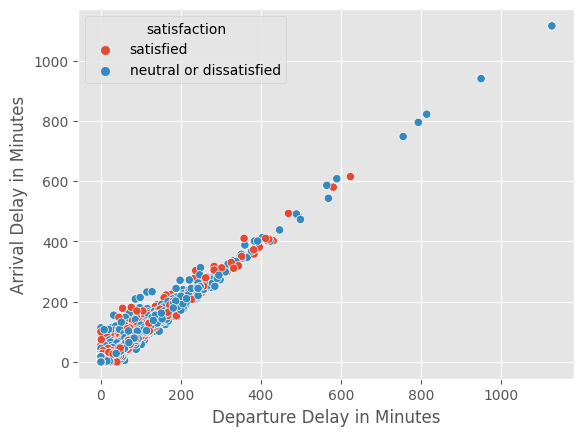

In [98]:
# labels Aktual

df_aktual = df[["Departure Delay in Minutes", "Arrival Delay in Minutes", "satisfaction"]]
sns.scatterplot(x = "Departure Delay in Minutes", y = "Arrival Delay in Minutes", data = df_aktual, hue = "satisfaction" )
plt.show()